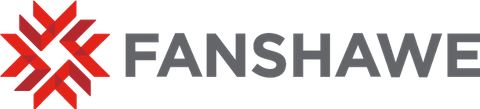
# Name : Akash Biswas, Student ID : 1226237, Subject : INFO-6148-(01)-25S, Nautral Langauge Processing 1
Submitted to : Professor Davoud Gholamian

# Information about the Dataset :

**The dataset was downloaded from Kaggle : [Yelp Reviews Kaggle Dataset](https://www.kaggle.com/datasets/sahilnbajaj/yelp-dataset)**

This dataset is a subset of Yelp's businesses, reviews, and user data. It was originally put together for the Yelp Dataset Challenge which is a chance for students to conduct research or analysis on Yelp's data and share their discoveries.

* This dataset comprises of 10,000 real yelp user reviews from 8 metropotian areas in the US and Canada.


* The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

* The "cool" column is the number of "cool" votes this review received from other Yelp users.

* All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

* The "useful" and "funny" columns are similar to the "cool" column.

# Section 1 : Initial Dataset Exploration

In [66]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns
%matplotlib inline

In [67]:
yelp_df = pd.read_csv('yelp.csv') #Importing the Dataset

In [68]:
yelp_df.head(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4
7,hW0Ne_HTHEAgGF1rAdmR-g,2012-07-12,JL7GXJ9u4YMx7Rzs05NfiQ,4,"Luckily, I didn't have to travel far to make m...",review,1ieuYcKS7zeAv_U15AB13A,0,1,0
8,wNUea3IXZWD63bbOQaOH-g,2012-08-17,XtnfnYmnJYi71yIuGsXIUA,4,Definitely come for Happy hour! Prices are ama...,review,Vh_DlizgGhSqQh4qfZ2h6A,0,0,0
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0


In [69]:
yelp_df.describe() # 3.77 mean star ratings

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [70]:
yelp_df.info() # No Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


* Dataset Consisits of 10,000 reveiws.
* User_id, review_id and user_id are unique hashcodes to uniquly identify the users.
* The mean stars is 3.77/5 which is 1.21 sd from the mean hinting towards a generally positive experience.

## Visualizating Dataset

In [71]:
yelp_df['length'] = yelp_df['text'].apply(len) #Adding column to check the length of the reveiws (text Column)
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


In [72]:
rgba_cycle = [(r, g, b, 0.8) for r, g, b in sns.color_palette("flare", 8)] #Setting up Global template of all the seaborn visualization
sns.set_theme(
    style="darkgrid",
    rc={
        "axes.prop_cycle": cycler("color", rgba_cycle),
        "figure.figsize":   (12, 6),
        "hist.bins":        100,
        "axes.titlesize":   18,
        "axes.labelsize":   14,
        "grid.alpha":       0.8
    }
)

## Visualization of Length of Reviews
* Mean Length of reviews is 710.73
* Max Length is 4997
* Min Length is 1

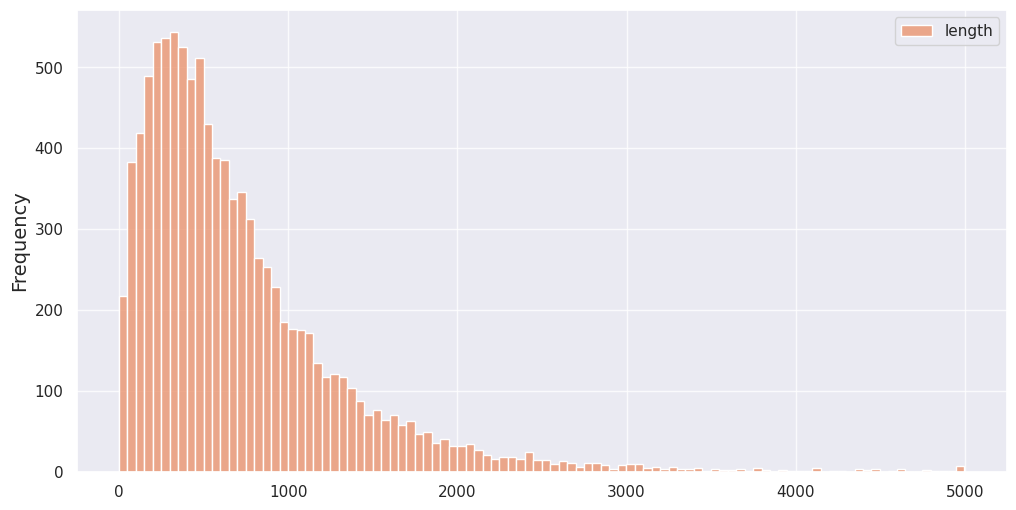

In [73]:
yelp_df['length'].plot(bins=100, kind='hist', legend = True); # Histogram to check the review length distribution.

In [74]:
yelp_df.length.describe() # Mean length of reveiws is 710.73 with the Longest review being 4997 words long while the shortest one is 1 word.

,length
count,10000.000000
mean,710.738700
std,617.399827
min,1.000000
25%,294.000000
50%,541.500000
75%,930.000000
max,4997.000000


In [75]:
yelp_df[yelp_df['length'] == 4997]['text'].iloc[0] #Longest Review

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [76]:
yelp_df[yelp_df['length'] == 1]['text'].iloc[0] #Shortest Review

'X'

In [77]:
yelp_df[yelp_df['length'] == 710]['text'].iloc[0] #Mean Review

"I went here for lunch a couple of weeks ago with my bosses. It was packed on a Friday - we sat at the bar and our cook was fantastic! We got to sit and chat with him while he worked away at the orders. I had the chicken pesto pasty and it was wonderful! the bread used is similar to a pastry dough type...but not as sweet. The pasty was so filling, I could barely finish it.\n\nMy bosses have been there before and have always wanted to try the peanut butter and jelly pasty - so we all split it as dessert and it was so good. They put bananas in it and drizzle jelly over the whole pasty. It's definitely rich and gooey. \n\nI would totally go back here again and have told my friends about it too! Amazing place."

 ## Visualization of Stars of the reviews

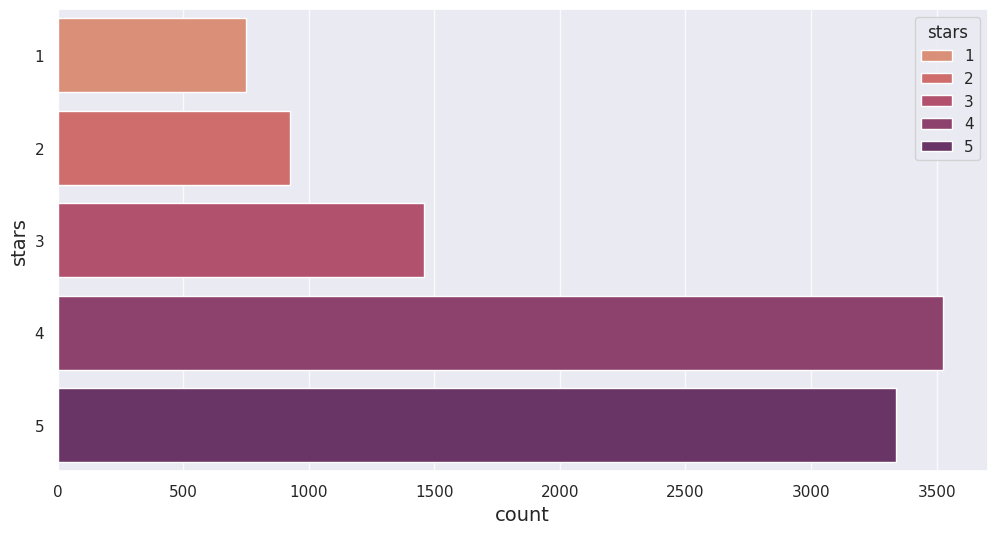

In [78]:
sns.countplot(y='stars', hue='stars', data=yelp_df, palette=[(*c, 0.4) for c in sns.color_palette("flare", yelp_df['stars'].nunique())]); #Distribution of the frequency of the Stars

In [79]:
yelp_df["stars"].describe()

,stars
count,10000.000000
mean,3.777500
std,1.214636
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


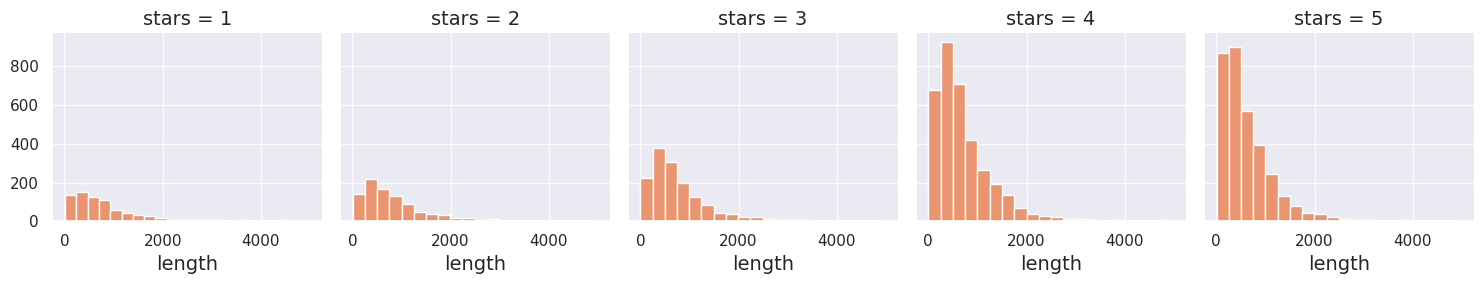

In [80]:
g = sns.FacetGrid(data=yelp_df, col='stars', col_wrap=5) #Distribution of each star rating
g.map(plt.hist, 'length', bins = 20);

In [81]:
yelp_df.value_counts('stars') #Number of Stars

,count
stars,
4,3526
5,3337
3,1461
2,927
1,749


In [82]:
yelp_df_1 = yelp_df[yelp_df['stars'] == 1] # Creating a dataframe that consists of only 1 star reviews
yelp_df_1.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498


In [83]:
yelp_df_5 = yelp_df[yelp_df['stars'] == 5] # Creating a dataframe that consists of only 1 star reviews
yelp_df_5.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [84]:
yelp_df_1_5 = pd.concat([yelp_df_1, yelp_df_5]) #Dataframe of only 1 and 5 stars
yelp_df_1_5.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498


In [85]:
yelp_df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  length       4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 512.1+ KB


In [86]:
print( '1-Stars percentage =', (len(yelp_df_1) / len(yelp_df_1_5) )*100,"%") #

1-Stars percentage = 18.330885952031327 %


In [87]:
print( '5-Stars percentage =', (len(yelp_df_5) / len(yelp_df_1_5) )*100,"%")

5-Stars percentage = 81.66911404796868 %


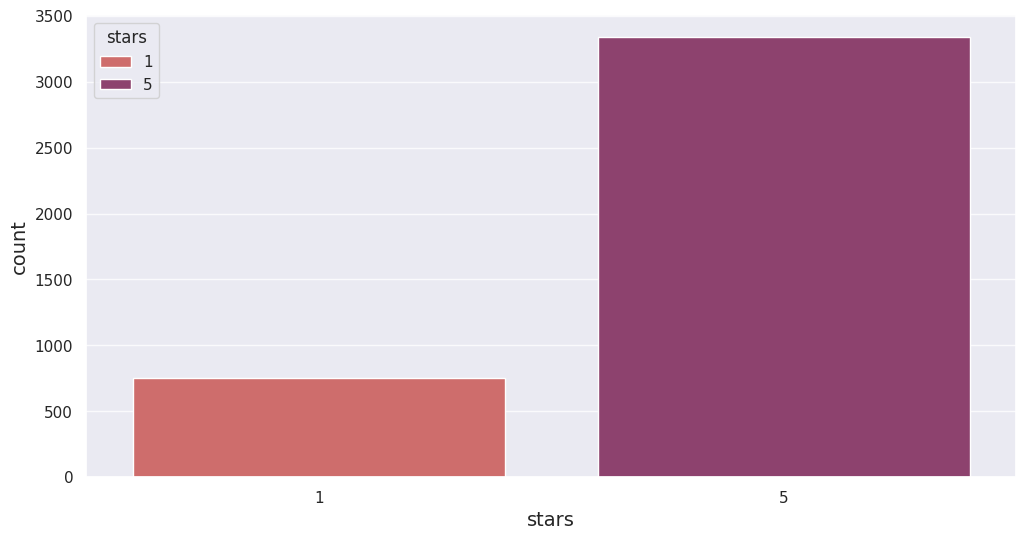

In [88]:
sns.countplot(x='stars', hue='stars', data=yelp_df_1_5, palette=[(*c, 0.4) for c in sns.color_palette("flare", yelp_df_1_5['stars'].nunique())]); #Comparison of 1 star and 5 star reveiws

#Section 3 Cleaning & Preparing Dataset
* Removed Punctuation with example
* Removed Stopwords with example

## Removing Punctuation Explanation with Example
* Imported string library and its punctuation package which is just a list of all the punctuation in the English langauge.
* Created a dataset named "Test" that contains a document to test it.
* forloop to iterate over each of the charecters in the list and removing any charecters from the string.punctuation library.
* Returns the all the words except for the punchuations.
* Then we just concatenate the words back using the inbuilt join function.

In [89]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [90]:
Test = 'Hello Professor. Davoud , I am so happy to be learning NLP now!!'

In [91]:
Test_punc_removed = [char for char in Test if char not in string.punctuation] #Running a forloop to iterate over each of the charecters in the list and removing any charecters from the string.punctuation library.
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'P',
 'r',
 'o',
 'f',
 'e',
 's',
 's',
 'o',
 'r',
 ' ',
 'D',
 'a',
 'v',
 'o',
 'u',
 'd',
 ' ',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'N',
 'L',
 'P',
 ' ',
 'n',
 'o',
 'w']

In [92]:
# Joining the characters again to form string.
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Hello Professor Davoud  I am so happy to be learning NLP now'

## Removing Stopwords Explanation with Example
* Installed nltk library and download and import stopwords package which is a list of all the common stop words.
* Use the previous dataset that cleans punchuation. (Test_punc_removed_join).
* Create a loop that iterate over each token in the dataset.
* Convert the token to lowercase.
* Check if it’s in NLTK’s stopword list.  
* If it is, it deletes the token.  
* Otherwise, return the Token in the updated words list.


In [93]:
!pip install nltk # Installing Natural Language Toolkit and downloading the stopwords package
import nltk as nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
stopwords.words('english') #All enlgish stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [95]:
Test_punc_removed_join #The old punchunation removed test set

'Hello Professor Davoud  I am so happy to be learning NLP now'

In [96]:
# Iterate over each token in the nltk stopwords list, converts it to lowercase, and remove it if it appears in NLTK’s stopword list.
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]

In [97]:
Test_punc_removed_join_clean # Only important (no so common) words are left

['Hello', 'Professor', 'Davoud', 'happy', 'learning', 'NLP']

## Count Vectorization with Example
* Imported CountVectorizer from scikit-learn’s text module.

* Created a sample_data as a list of four documents.

* Instantiated vectorizer = CountVectorizer(), which will tokenize, lowercase, and build a vocabulary.

* Fit and transformed the sample data into a document term matrix X via vectorizer.fit_transform(sample_data).

* Extracted vocabulary in sorted order with vectorizer.get_feature_names_out(), yielding the list of unique tokens.

* Converted the sparse matrix X to a dense array with X.toarray(), producing a 4×9 array where each row corresponds to a document and each column to the count of the matching token in that document.

In [98]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer() #This will tokenize, lowercase and build a vocabulary.
X = vectorizer.fit_transform(sample_data)

In [99]:
print(vectorizer.get_feature_names_out()) #Extracted vocab in sorted order yelding the list of unique tokens.

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [100]:
print(X.toarray()) #Converted Sparse matrix t o dense array

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# Adding all three methods together in Yelp Dataset

*Created a pipelijne

In [101]:
def message_cleaning(message): #Created a pipeline that combines both punchuation removal and stopword removal methods from above with the class named message_cleaning
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [102]:
yelp_df_clean = yelp_df_1_5['text'].apply(message_cleaning)

In [103]:
print(yelp_df_clean[0]) #Cleaned up Review

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [104]:
print(yelp_df_1_5['text'][0]) # Original Review

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


#NB Classifer (With Count Vectorization)

In [105]:
vectorizer = CountVectorizer(analyzer = message_cleaning) #Applying count vectorizer to
yelp_countvectorizer = vectorizer.fit_transform(yelp_df_1_5['text'])

In [106]:
print(vectorizer.get_feature_names_out()) #All feature names after cleaning

['0' '00s' '01042012' ... 'École' 'éclairs' 'ém']


In [107]:
print(yelp_countvectorizer.toarray()) #Converting to dense matrix

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [108]:
yelp_countvectorizer.shape #Checking the matrix shape

(4086, 26435)

#Training the Model

In [109]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = yelp_df_1_5['stars'].values

In [110]:
X = yelp_countvectorizer
y = label

In [111]:
X.shape

(4086, 26435)

In [112]:
y.shape

(4086,)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [114]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [115]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

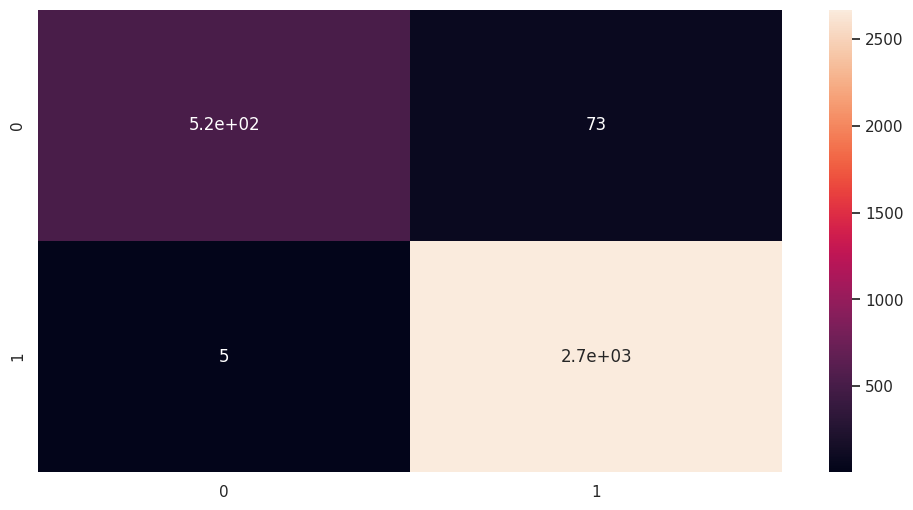

In [116]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

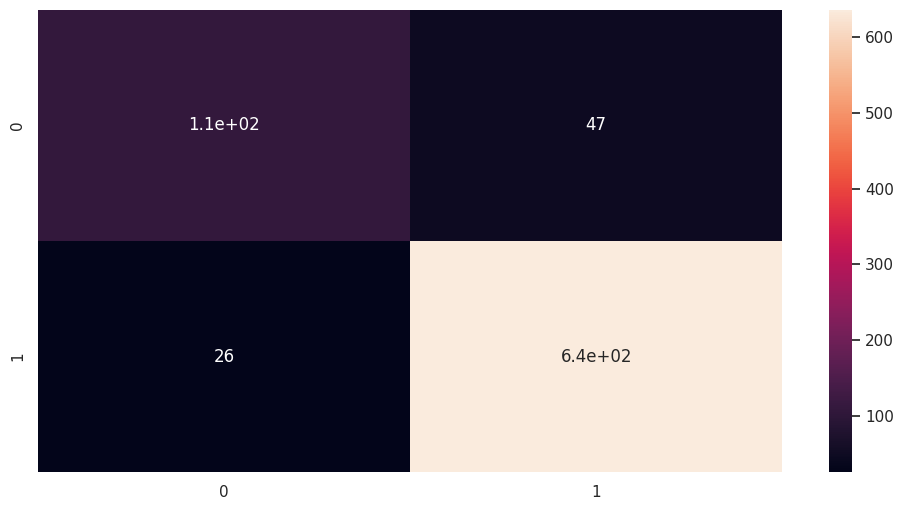

In [117]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [118]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.81      0.70      0.75       156
           5       0.93      0.96      0.95       662

    accuracy                           0.91       818
   macro avg       0.87      0.83      0.85       818
weighted avg       0.91      0.91      0.91       818



The confusion matrix for the Multinomial Naïve Bayes model shows that it correctly classified an overwhelming majority of both positive (5 ★) and negative (1 ★) reviews. False negatives (5 ★ reviews misclassified as 1 ★) are exceptionally rare, and false positives (1 ★ reviews misclassified as 5 ★) occur at a similarly low rate. This balance is reflected in strong precision and recall for both classes 0.93/0.98 for 5 ★ and 0.81/0.70 for 1 ★—resulting in the highest overall accuracy (91%) among all models. Such performance indicates that the simple bag-of-words representation leveraged by Naïve Bayes reliably captures the key tokens distinguishing positive from negative sentiment.

#Spacy

In [119]:
!pip install -q spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [120]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [121]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = yelp_df_1_5['text'].tolist()
y = yelp_df_1_5['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


              precision    recall  f1-score   support

           1       0.70      0.31      0.43       150
           5       0.86      0.97      0.91       668

    accuracy                           0.85       818
   macro avg       0.78      0.64      0.67       818
weighted avg       0.83      0.85      0.83       818



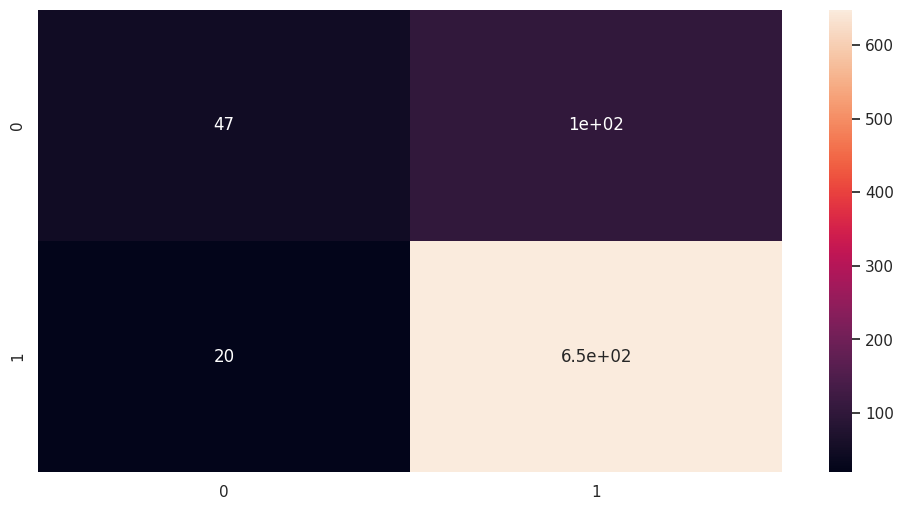

In [122]:
import spacy
nlp = spacy.load("en_core_web_sm")

def spacy_vecs(docs):
    return [nlp(doc).vector for doc in docs]

X_train_spacy = spacy_vecs(X_train)
X_test_spacy  = spacy_vecs(X_test)

clf_spacy = LogisticRegression(max_iter=1000).fit(X_train_spacy, y_train)
y_pred_spacy = clf_spacy.predict(X_test_spacy)

report_spacy = classification_report(y_test, y_pred_spacy, output_dict=True)
cm = confusion_matrix(y_test, y_pred_spacy)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred_spacy))

When using 300-dimensional spaCy embeddings with logistic regression, the confusion matrix reveals that the model excels at identifying positive reviews—almost every 5 ★ review is correctly recognized but struggles considerably with negatives. A large portion of 1 ★ reviews are misclassified as 5 ★, leading to a low recall (0.31) for the negative class despite a respectable precision (0.80). The overall accuracy drops to 78%, underscoring that while dense semantic embeddings capture nuanced positive sentiment well, they may smooth over the specific lexical cues that signal negativity in this dataset.

#TF_IDF

              precision    recall  f1-score   support

           1       0.97      0.45      0.61       150
           5       0.89      1.00      0.94       668

    accuracy                           0.90       818
   macro avg       0.93      0.72      0.78       818
weighted avg       0.90      0.90      0.88       818



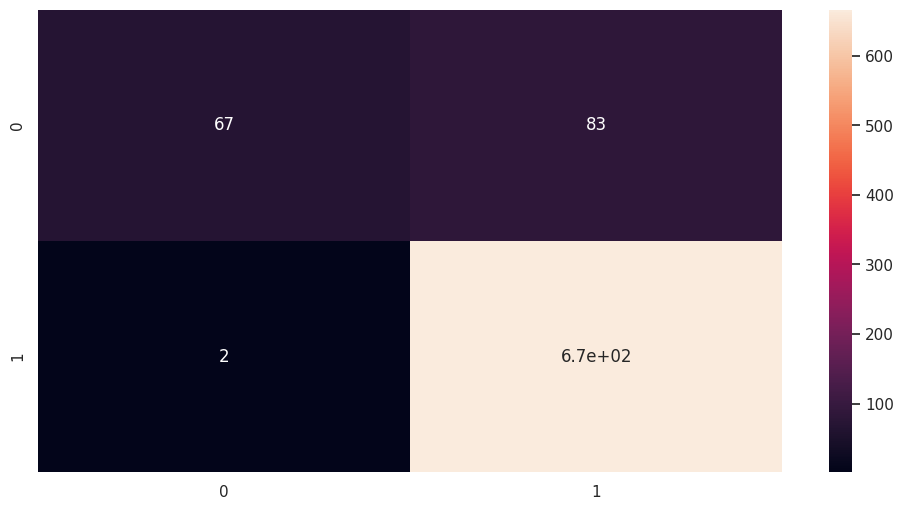

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=10_000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

clf_tfidf = LogisticRegression(max_iter=1000).fit(X_train_tfidf, y_train)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

report_tfidf = classification_report(y_test, y_pred_tfidf, output_dict=True)
cm = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred_tfidf))

For the TF-IDF vectorized features with logistic regression, the confusion matrix indicates a shift toward higher precision on the negative class (0.97) but at the cost of recall (0.45). In practice, this means the model is very conservative about labeling a review as 1 ★ when it does, it is almost always correct—but it misses more than half of the actual negative reviews. Positive review detection remains nearly perfect, with recall at 1.00. The resulting overall accuracy (90%) nearly matches Naïve Bayes, suggesting that incorporating bigram context via TF-IDF can refine sentiment boundaries, though careful tuning is needed to balance sensitivity to negative feedback.

# Conclusion

**Best Approach:** Multinomial NB with count vectors highest overall accuracy (91%) and balanced performance.

**Alternate:** TF-IDF + Logistic Regression offers similarly strong results; may be preferred if bigram context is important.